# Problem one

Consider the initial-value problem
$$
	\frac{dy}{dx}-2y=3e^{2x}, \hspace{10mm} y(0)=0.
$$

**(a)** Solve the problem analytically.

**(b)** For $0\leq x\leq1$, plot the analytic solution together with the numerical solution obtained using `odeint`. In the numerical solution, use a step size small enough to illustrate any inaccuracies.

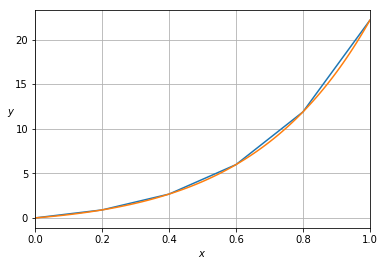

In [1]:
import math
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
%matplotlib inline

def f(y, x): # odeint expects the dependent variable as the first argument
    return 2*y + 3*math.exp(2*x)

y0 = 0

x_range = (0, 1)

#fig, ax = plt.subplots()
#ax.set_aspect('equal')
#plt.title('Figure 1: Numerical approximation methods')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

# approximation using odeint
h = 0.2
x = np.arange(x_range[0], x_range[1] + h, h)
y = odeint(f, y0, x)
plt.plot(x, y)

# analytic solution
h = 0.01
x = np.arange(x_range[0], x_range[1] + h, h)
y = 3*x*np.exp(2*x)
plt.plot(x, y)

plt.xlim(x_range)

plt.show()

# Problem two

Consider the equation
$$
	\frac{d^2y}{dt^2}+y=3t.
$$

**(a)** Show that the function $y(t)=3t$ satisfies the equation.

**(b)** Find (analytically) the general solution of the equation.

**(c)** Find the particular solution satisfying $y(0)=2$, $y'(0)=-2$.

**(d)** For $0\leq t\leq 10$, plot the particular solution you obtained in part (c) together with the numerical solution obtained using `odeint`. In the numerical solution, use a step size small enough to illustrate any inaccuracies.

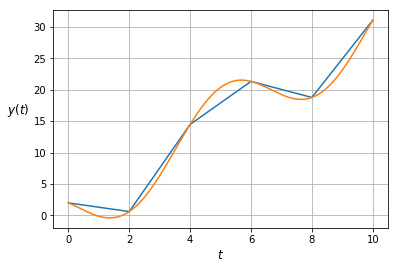

In [7]:
def dU_dt(U, t):
    y = U[0]
    z = U[1]
    dy_dt = z
    dz_dt = 3*t - y
    return (dy_dt, dz_dt)

y0 = 2
z0 = -2
U0 = (y0, z0)

t_range = (0, 10)
plt.grid(True)
plt.xlabel('$t$', fontsize = 12)
plt.ylabel('$y(t)$', fontsize = 12, labelpad=15).set_rotation(0)

# approximation using odeint
h = 2
t = np.arange(t_range[0], t_range[1] + h, h)
U = odeint(dU_dt, U0, t)
y = U[:,0]
plt.plot(t, y)

# analytic solution
h = 0.01
t = np.arange(t_range[0], t_range[1] + h, h)
y = 2*np.cos(t) - 5*np.sin(t) + 3*t
plt.plot(t, y)

plt.show()

# Problem three

For the cheetah-gazelle example given in Chapter 11:

**(a)** In the $(y,z)$-plane, plot the parametric curve $(y(t),z(t))$ for some appropriate range of $t$. What do you think an appropriate maximum value for $t$ would be (remember, the populations are periodic)?

**Note.** What you have just drawn is called the *phase portrait* of the system.

**(b)** Experiment by changing the initial populations and observing how the phase portrait changes (if you draw these on the same plot, you should see a family of concentric, closed curves).

**(c)** Based on your experimentation in (b), can you estimate the pair of stable populations $(x^*,y^*)$, that is, the pair of populations such that, if $y(0)=y^*$ and $z(0)=z^*$, then $y(t)=y^*$ and $z(t)=z^*$ for all $t\geq0$.

**(d)** Find the precise values of the stable populations using the Volterra equations (note that extinction is one solution).

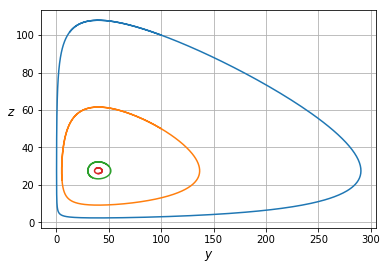

In [17]:
def dU_dt(U, t):
    a = 1.1
    b = 0.4
    p = 0.04
    q = 0.01
    
    y = U[0]
    z = U[1]
    dy_dt = y*(a - p*z)
    dz_dt = z*(-b + q*y)
    
    return (dy_dt, dz_dt)

t_range = (0, 15)
plt.grid(True)
plt.xlabel('$y$', fontsize = 12)
plt.ylabel('$z$', fontsize = 12).set_rotation(0)

h = 0.01
t = np.arange(t_range[0], t_range[1] + h, h)
for U0 in [(100, 100), (100, 50), (50, 30), (40, 26)]:
    U = odeint(dU_dt, U0, t) # returns (y0, z0), (y1, z1), (y2, z2), ...
    y = U[:,0]
    z = U[:,1]
    plt.plot(y, z)

plt.show()

# Problem four

Plot the numerical solution to the initial-value problem
$$
    \frac{d^2y}{dt^2}=-y \left( \frac{dy}{dt} \right)^2, \hspace{10mm} y(0)=0, \hspace{5mm} y'(0)=1
$$
for $0\leq t \leq 10$.

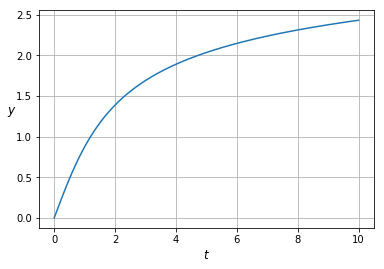

In [12]:
def dU_dt(U, t):
    y = U[0]
    z = U[1]
    dy_dt = z
    dz_dt = -y * z**2
    return (dy_dt, dz_dt)

y0 = 0
z0 = 1
U0 = (y0, z0)

t_range = (0, 10)
plt.grid(True)
plt.xlabel('$t$', fontsize = 12)
plt.ylabel('$y$', fontsize = 12).set_rotation(0)

h = 0.01
t = np.arange(t_range[0], t_range[1] + h, h)
U = odeint(dU_dt, U0, t)
y = U[:,0]
plt.plot(t, y)

plt.show()

# Problem five

Find the eigenvalues and corresponding eigenfunctions of the boundary value problem
$$
    y''+\lambda y = 0;\hspace{10mm}y'(0)=0,\hspace{5mm}y(1)=0.
$$
Plot the first four eigenfunctions you find and confirm visually that they satisfy the given boundary conditions.

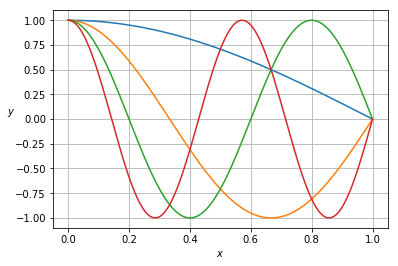

In [1]:
import numpy as np
from math import pi
from matplotlib import pyplot as plt
%matplotlib inline

plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

def y(x, n):
    return np.cos((2*n-1)*pi/2*x) # see handwritten solutions

x = np.linspace(0, 1, 1000)
for n in (1, 2, 3, 4):
    plt.plot(x, y(x, n))

plt.show()

We see that the slopes of all eigenfunctions are zero at the left-hand boundary and that all eigenfunctions equal zero at the right-hand boundary, as required.